This project predicts the ratings of apps downloaded from Google Play Store.

About the data:

* App - app Name 
* Category - category of App
* Rating - user rating ranging from 1 to 5
* Reviews - number of reviews given by users 
* Size - app size listed in either MB or kb 
* Installs - number of downloads 
* Type - apps are either free or paid
* Price - app price
* Content Rating - rating based on age recommendation
* Genres - genre of app 
* Last Updated - date app was last updated 
* Current Ver - current version of app 
* Android Ver - android version of app 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
apps = pd.read_csv("drive/MyDrive/Projects/Deploy/Google App Prediction/googleplaystore.csv")
apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
apps.shape # return number of rows, columns

(10841, 13)

In [5]:
apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
# Ratings should range from 1 to 5; any above 5 or missing will be dropped
apps[apps['Rating']>5].count()['Rating']

1

In [7]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


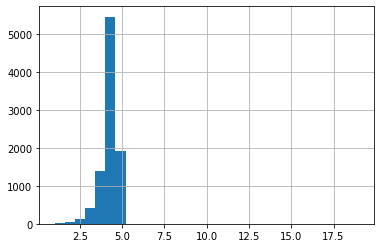

In [8]:
apps['Rating'].hist(bins=30)

In [9]:
apps = apps[apps['Rating'] <= 5]

In [10]:
apps.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


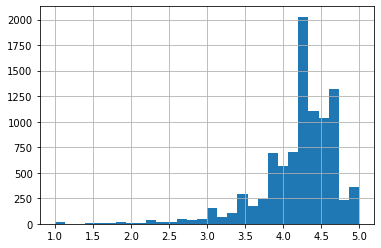

In [11]:
apps['Rating'].hist(bins=30)

In [12]:
apps['Date'] = pd.to_datetime(apps['Last Updated']) # create a date column for latest updates

In [13]:
apps['Year'] = apps['Date'].apply(lambda t: t.year) # extract year
apps['Month'] = apps['Date'].apply(lambda t: t.month) # extract month

In [14]:
apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
Date              0
Year              0
Month             0
dtype: int64

In [15]:
apps = apps.dropna(how = 'any')

apps.shape

(9360, 16)

In [16]:
apps.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up,2018-01-07,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,2018-01-15,2018,1


In [17]:
apps.info() # all of these columns will change to numerical dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9360 non-null   object        
 1   Category        9360 non-null   object        
 2   Rating          9360 non-null   float64       
 3   Reviews         9360 non-null   object        
 4   Size            9360 non-null   object        
 5   Installs        9360 non-null   object        
 6   Type            9360 non-null   object        
 7   Price           9360 non-null   object        
 8   Content Rating  9360 non-null   object        
 9   Genres          9360 non-null   object        
 10  Last Updated    9360 non-null   object        
 11  Current Ver     9360 non-null   object        
 12  Android Ver     9360 non-null   object        
 13  Date            9360 non-null   datetime64[ns]
 14  Year            9360 non-null   int64         
 15  Mon

In [18]:
apps['Size'].unique() # list all unique size values

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [19]:
SizeList = [] 
# this function will convert MB sizes to numbers as listed 
# and kb sizes divided by 1000
# the average app size will replace 'Varies with device'
def extractingSize(x):
  global SizeList
  if not x.startswith("Varies"):
    if 'M' in x:
      x = x.split('M')[0]
      x = float(x)
      SizeList.append(x)
    else:
      x = x.split('k')[0]
      x = float(x)/1000
      SizeList.append(x) 
  return x

In [20]:
# convert these values to numeric values, except for 'Varies with device' at the moment
apps['Size'] = apps['Size'].apply(lambda x: extractingSize(x))

In [21]:
apps['Size'].value_counts()

Varies with device    1637
14.0                   165
12.0                   161
11.0                   159
15.0                   159
                      ... 
0.516                    1
0.473                    1
0.208                    1
0.246                    1
0.556                    1
Name: Size, Length: 412, dtype: int64

In [22]:
np.mean(SizeList) # check the mean app size

22.970456105140492

In [23]:
# this function will replace 'Varies with device' with mean app size
def extractingSize2(x):
  global SizeList
  x = str(x)
  if x.startswith("Varies"):
    x = np.mean(SizeList)
  else:
    x = float(x)
  return x

In [24]:
apps['Size'] = apps['Size'].apply(lambda x: extractingSize2(x))
apps['Size'].value_counts()

22.970456    1637
14.000000     165
12.000000     161
15.000000     159
11.000000     159
             ... 
0.082000        1
0.008500        1
0.239000        1
0.865000        1
0.816000        1
Name: Size, Length: 412, dtype: int64

In [25]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up,2018-01-07,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,2018-01-15,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up,2018-08-01,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up,2018-06-08,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2018-06-20,2018,6


In [26]:
apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Date              0
Year              0
Month             0
dtype: int64

In [27]:
apps['Category'].value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [28]:
apps['Type'].value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

In [29]:
apps['Content Rating'].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [30]:
apps['Genres'].value_counts() # very similar to Category

Tools                      732
Entertainment              533
Education                  468
Action                     358
Productivity               351
                          ... 
Lifestyle;Education          1
Board;Pretend Play           1
Comics;Creativity            1
Tools;Education              1
Entertainment;Education      1
Name: Genres, Length: 115, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(apps['Category'])
apps['Category'] = le.transform(apps['Category'])

In [32]:
print(le.classes_) # ART_AND_DESIGN assigned value 0, AUTO_AND_VEHICLES assigned value 1, etc ...

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FAMILY' 'FINANCE' 'FOOD_AND_DRINK' 'GAME' 'HEALTH_AND_FITNESS'
 'HOUSE_AND_HOME' 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'MAPS_AND_NAVIGATION'
 'MEDICAL' 'NEWS_AND_MAGAZINES' 'PARENTING' 'PERSONALIZATION'
 'PHOTOGRAPHY' 'PRODUCTIVITY' 'SHOPPING' 'SOCIAL' 'SPORTS' 'TOOLS'
 'TRAVEL_AND_LOCAL' 'VIDEO_PLAYERS' 'WEATHER']


In [33]:
le.fit(apps['Content Rating'])
apps['Content Rating'] = le.transform(apps['Content Rating'])

print(le.classes_)

['Adults only 18+' 'Everyone' 'Everyone 10+' 'Mature 17+' 'Teen' 'Unrated']


In [34]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,"10,000+",Free,0,1,Art & Design,07-Jan-18,1.0.0,4.0.3 and up,2018-01-07,2018,1
1,Coloring book moana,0,3.9,967,14.0,"500,000+",Free,0,1,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,2018-01-15,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,"5,000,000+",Free,0,1,Art & Design,01-Aug-18,1.2.4,4.0.3 and up,2018-08-01,2018,8
3,Sketch - Draw & Paint,0,4.5,215644,25.0,"50,000,000+",Free,0,4,Art & Design,08-Jun-18,Varies with device,4.2 and up,2018-06-08,2018,6
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,"100,000+",Free,0,1,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2018-06-20,2018,6


In [35]:
apps['Type'] = apps['Type'].map({'Paid':1, 'Free':0})

In [36]:
apps['Type'].value_counts()

0    8715
1     645
Name: Type, dtype: int64

In [37]:
# Dropping columns: 
# we don't need App name; Genres are related to Category; app version is irrelevant

apps = apps.drop([ 'App','Genres', 'Current Ver'], axis = 1)

apps.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Date,Year,Month
0,0,4.1,159,19.0,"10,000+",0,0,1,07-Jan-18,4.0.3 and up,2018-01-07,2018,1
1,0,3.9,967,14.0,"500,000+",0,0,1,15-Jan-18,4.0.3 and up,2018-01-15,2018,1
2,0,4.7,87510,8.7,"5,000,000+",0,0,1,01-Aug-18,4.0.3 and up,2018-08-01,2018,8
3,0,4.5,215644,25.0,"50,000,000+",0,0,4,08-Jun-18,4.2 and up,2018-06-08,2018,6
4,0,4.3,967,2.8,"100,000+",0,0,1,20-Jun-18,4.4 and up,2018-06-20,2018,6


In [38]:
apps['Installs'].value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [39]:
apps['Installs'] = apps['Installs'].apply(lambda I: I.split('+')[0]) # remove the +

In [40]:
apps['Installs'] = apps['Installs'].apply(lambda I: I.replace(",", "")) # remove the comma

In [41]:
apps['Installs'].value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [43]:
apps.info() # still a few more features to change to numerical values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        9360 non-null   int64         
 1   Rating          9360 non-null   float64       
 2   Reviews         9360 non-null   object        
 3   Size            9360 non-null   float64       
 4   Installs        9360 non-null   object        
 5   Type            9360 non-null   int64         
 6   Price           9360 non-null   object        
 7   Content Rating  9360 non-null   int64         
 8   Last Updated    9360 non-null   object        
 9   Android Ver     9360 non-null   object        
 10  Date            9360 non-null   datetime64[ns]
 11  Year            9360 non-null   int64         
 12  Month           9360 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1023.8+ KB


In [44]:
apps['Installs'] = apps['Installs'].apply(lambda I: int(I))

In [45]:
apps['Reviews'] = apps['Reviews'].apply(lambda R: int(R))

In [46]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        9360 non-null   int64         
 1   Rating          9360 non-null   float64       
 2   Reviews         9360 non-null   int64         
 3   Size            9360 non-null   float64       
 4   Installs        9360 non-null   int64         
 5   Type            9360 non-null   int64         
 6   Price           9360 non-null   object        
 7   Content Rating  9360 non-null   int64         
 8   Last Updated    9360 non-null   object        
 9   Android Ver     9360 non-null   object        
 10  Date            9360 non-null   datetime64[ns]
 11  Year            9360 non-null   int64         
 12  Month           9360 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory usage: 1023.8+ KB


In [47]:
apps['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1129
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             337
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
5.0 - 6.0                1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [48]:
# clean the 'Andriod Ver' column

ver_list = apps['Android Ver'].to_list()
ver = []
def extractingAndroid(x):
  for item in x:
    if not item.startswith("Varies"):
      s = str(item[:3])
      ver.append(float(s))
    else:
      ver.append(4.4) # replace 4.4 with 'Varies with device'

extractingAndroid(ver_list)
apps['Android Ver'] = ver

In [49]:
apps['Price'].value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$13.99        1
$18.99        1
$1.75         1
$379.99       1
$3.88         1
Name: Price, Length: 73, dtype: int64

In [50]:
# clean the Price column

price_list = apps['Price'].to_list()
prices = []
def extractingPrice(x):
  for item in x:
    if item != 0:
      s = item.replace("$", "")
      prices.append(float(s))
    else:
      prices.append(0.0)

extractingPrice(price_list)
apps['Price'] = prices

In [51]:
apps['Android Ver'].value_counts()

4.0    2371
4.4    2200
4.1    2060
2.3     822
5.0     538
4.2     337
3.0     211
2.2     208
4.3     207
2.1     113
1.6      87
6.0      48
7.0      42
2.0      34
3.2      31
5.1      18
1.5      15
3.1       8
8.0       5
7.1       3
1.0       2
Name: Android Ver, dtype: int64

In [52]:
apps['Price'].value_counts()

0.00      8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

In [53]:
apps.head(5)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Date,Year,Month
0,0,4.1,159,19.0,10000,0,0.0,1,07-Jan-18,4.0,2018-01-07,2018,1
1,0,3.9,967,14.0,500000,0,0.0,1,15-Jan-18,4.0,2018-01-15,2018,1
2,0,4.7,87510,8.7,5000000,0,0.0,1,01-Aug-18,4.0,2018-08-01,2018,8
3,0,4.5,215644,25.0,50000000,0,0.0,4,08-Jun-18,4.2,2018-06-08,2018,6
4,0,4.3,967,2.8,100000,0,0.0,1,20-Jun-18,4.4,2018-06-20,2018,6


In [54]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        9360 non-null   int64         
 1   Rating          9360 non-null   float64       
 2   Reviews         9360 non-null   int64         
 3   Size            9360 non-null   float64       
 4   Installs        9360 non-null   int64         
 5   Type            9360 non-null   int64         
 6   Price           9360 non-null   float64       
 7   Content Rating  9360 non-null   int64         
 8   Last Updated    9360 non-null   object        
 9   Android Ver     9360 non-null   float64       
 10  Date            9360 non-null   datetime64[ns]
 11  Year            9360 non-null   int64         
 12  Month           9360 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(7), object(1)
memory usage: 1023.8+ KB


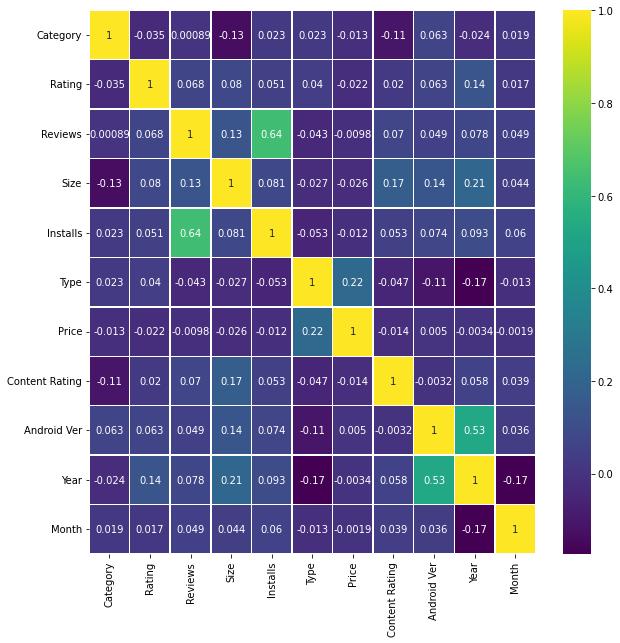

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(apps.corr(),annot=True,cmap='viridis',linewidths=.5)

# There is correlation between Reviews and Installs along with Android version and Year

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [57]:
y = apps['Rating']
X = apps.drop(["Rating", "Last Updated", "Reviews", "Android Ver", "Date"], axis = 1)

In [58]:
X.columns

Index(['Category', 'Size', 'Installs', 'Type', 'Price', 'Content Rating',
       'Year', 'Month'],
      dtype='object')

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
pca_fit = pca.fit_transform(X)

In [60]:
Xtrain, Xtest, ytrain, ytest = train_test_split(pca_fit, y, test_size=0.2)

In [150]:
lm_model = LinearRegression().fit(Xtrain, ytrain)

In [151]:
lm_pred = lm_model.predict(Xtest)

In [154]:
rf_model = RandomForestRegressor(n_estimators=1775, n_jobs = 8).fit(Xtrain, ytrain)

In [155]:
rf_pred = rf_model.predict(Xtest)

In [140]:
gb_model = GradientBoostingRegressor(n_estimators=550, alpha=0.95, learning_rate=0.01).fit(Xtrain, ytrain)
ab_model = AdaBoostRegressor(n_estimators=650, learning_rate=0.01).fit(Xtrain, ytrain)

In [141]:
gb_pred = gb_model.predict(Xtest)
ab_pred = ab_model.predict(Xtest)

In [152]:
# linear model training accuracy

lm_model_accuracy = round(lm_model.score(Xtrain, ytrain)*100,2)
print(round(lm_model_accuracy, 2), '%')

0.95 %


In [156]:
# random forest training accuracy

rf_model_accuracy = round(rf_model.score(Xtrain, ytrain)*100,2)
print(round(rf_model_accuracy, 2), '%')

86.14 %


In [143]:
# gradient boosting training accuracy

gb_model_accuracy = round(gb_model.score(Xtrain, ytrain)*100,2)
print(round(gb_model_accuracy, 2), '%')

13.68 %


In [144]:
# adaboost training accuracy

ab_model_accuracy = round(ab_model.score(Xtrain, ytrain)*100,2)
print(round(ab_model_accuracy, 2), '%')

-2.93 %


In [153]:
# linear model testing accuracy

lm_model_accuracy = round(lm_model.score(Xtest, ytest)*100,2)
print(round(lm_model_accuracy, 2), '%')
print(r2_score(lm_pred, ytest))

0.92 %
-118.98985538660222


In [157]:
# random forest testing accuracy

rf_model_accuracy = round(rf_model.score(Xtest, ytest)*100,2)
print(round(rf_model_accuracy, 2), '%')
print(r2_score(rf_pred, ytest))

10.96 %
-2.6033000960166057


In [146]:
# gradient boosting testing accuracy

gb_model_accuracy = round(gb_model.score(Xtest, ytest)*100,2)
print(round(gb_model_accuracy, 2), '%')
print(r2_score(gb_pred, ytest))

5.95 %
-13.123314195698196


In [147]:
# adaboost testing accuracy

ab_model_accuracy = round(ab_model.score(Xtest, ytest)*100,2)
print(round(ab_model_accuracy, 2), '%')
print(r2_score(ab_pred, ytest))

-4.56 %
-6.95961028621906


In [158]:
# Save best model as a pickle string
import pickle 

saved_model = pickle.dump(rf_model, open('drive/MyDrive/Projects/Deploy/Google App Prediction/Apps.pickle','wb'))

saved_pca = pickle.dump(pca, open('drive/MyDrive/Projects/Deploy/Google App Prediction/AppsPCA.pickle','wb'))